# BA820 Project Proposal: Regulatory Complexity and Approval Dynamics in Drug Development

   **Project Title:** Regulatory Complexity and Approval Dynamics in Drug Development
   
   **Section and Team Number:** B1 Team 9

   **Members:** Kara Liao, Li-Hsin Chang, Mokhinur Talibzhanova, Nathan Dai-Yin Leung

## Backup Dataset: European Drug Development


### Environment Setup

In [25]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Mount Drive
drive.mount('/content/drive')

# 2. Path to the drugs dataset in the root of MyDrive
path_drugs = '/content/drive/MyDrive/drugs.csv'

# 3. Load Data
drugs = pd.read_csv(path_drugs)

# 4. Verify loading
print(f"Drugs dataset loaded with {drugs.shape[0]} rows.")
display(drugs.head())

# 5. Missing Values Table (Directly showing the table)
drugs_missing = drugs.isnull().sum()
drugs_pct = (drugs.isnull().sum() / len(drugs)) * 100

missing_summary = pd.concat([drugs_missing, drugs_pct], axis=1)
missing_summary.columns = ['Missing Count', 'Percentage (%)']

# Filter to show only columns with missing data and sort by percentage
missing_summary = missing_summary[missing_summary['Missing Count'] > 0].sort_values(by='Percentage (%)', ascending=False)

print("\n--- Missing Values Summary: Drug Development Dataset ---")
if missing_summary.empty:
    print("No missing values found!")
else:
    display(missing_summary)

# INITIAL INSPECTION
print("Dataset Shape:", drugs.shape)
print(drugs.info())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drugs dataset loaded with 1988 rows.


,category,medicine_name,therapeutic_area,common_name,active_substance,product_number,patient_safety,authorisation_status,atc_code,additional_monitoring,...,marketing_authorisation_holder_company_name,pharmacotherapeutic_group,date_of_opinion,decision_date,revision_number,condition_indication,species,first_published,revision_date,url
0,human,Adcetris,"Lymphoma, Non-Hodgkin; Hodgkin Disease",brentuximab vedotin,brentuximab vedotin,2455,False,authorised,L01XC12,False,...,Takeda Pharma A/S,Antineoplastic agents,2012-07-19,2022-11-17,34.0,Hodgkin lymphomaAdcetris is indicated for adul...,NaN,2018-07-25T13:58:00Z,2023-03-13T11:52:00Z,https://www.ema.europa.eu/en/medicines/human/E...
1,human,Nityr,Tyrosinemias,nitisinone,nitisinone,4582,False,authorised,A16AX04,False,...,Cycle Pharmaceuticals (Europe) Ltd,"Other alimentary tract and metabolism products,",2018-05-31,2023-03-10,4.0,Treatment of adult and paediatric patients wit...,NaN,2018-07-26T14:20:00Z,2023-03-10T17:29:00Z,https://www.ema.europa.eu/en/medicines/human/E...
2,human,Ebvallo,Lymphoproliferative Disorders,tabelecleucel,tabelecleucel,4577,False,authorised,NaN,True,...,Pierre Fabre Medicament,NaN,2022-10-13,2023-03-09,2.0,Ebvallo is indicated as monotherapy for treatm...,NaN,2022-10-12T16:13:00Z,2023-03-10T13:40:00Z,https://www.ema.europa.eu/en/medicines/human/E...
3,human,Ronapreve,COVID-19 virus infection,"casirivimab, imdevimab","casirivimab, imdevimab",5814,False,authorised,J06BD,True,...,Roche Registration GmbH,"Immune sera and immunoglobulins,",2021-11-11,2023-02-24,3.0,Ronapreve is indicated for:Treatment of COVID-...,NaN,2021-11-12T16:30:00Z,2023-03-10T12:29:00Z,https://www.ema.europa.eu/en/medicines/human/E...
4,human,Cosentyx,"Arthritis, Psoriatic; Psoriasis; Spondylitis...",secukinumab,secukinumab,3729,False,authorised,L04AC10,False,...,Novartis Europharm Limited,Immunosuppressants,2014-11-20,2023-01-26,30.0,Plaque psoriasisCosentyx is indicated for the ...,NaN,2018-06-07T11:59:00Z,2023-03-09T18:53:00Z,https://www.ema.europa.eu/en/medicines/human/E...



--- Missing Values Summary: Drug Development Dataset ---


,Missing Count,Percentage (%)
date_of_refusal_of_marketing_authorisation,1913,96.227364
species,1709,85.965795
date_of_opinion,779,39.185111
therapeutic_area,285,14.336016
revision_number,96,4.828974
marketing_authorisation_date,60,3.018109
decision_date,45,2.263581
pharmacotherapeutic_group,34,1.710262
revision_date,29,1.458753
atc_code,28,1.408451


Dataset Shape: (1988, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   category                                     1988 non-null   object 
 1   medicine_name                                1988 non-null   object 
 2   therapeutic_area                             1703 non-null   object 
 3   common_name                                  1984 non-null   object 
 4   active_substance                             1987 non-null   object 
 5   product_number                               1988 non-null   int64  
 6   patient_safety                               1988 non-null   bool   
 7   authorisation_status                         1987 non-null   object 
 8   atc_code                                     1960 non-null   object 
 9   additional_monitoring                        198

### Data Cleaning

In [49]:
import numpy as np

#  INITIAL RECOUNT (BEFORE)
print(f"Initial Shape: {drugs.shape}")

# DATA CLEANING
# Standardize text columns (remove leading/trailing spaces)
text_cols = ['medicine_name', 'therapeutic_area', 'authorisation_status']
for col in text_cols:
    drugs[col] = drugs[col].astype(str).str.strip()

# Handle "Hidden" Missing Values:
drugs = drugs.replace('NA', np.nan)

# Filter Irrelevant Data:
df_clean = drugs[drugs['category'] == 'human'].copy()

# Drop columns with extreme missingness (> 95% missing)
# Based on our previous table, identify columns that are useless for modeling
threshold = len(df_clean) * 0.95
df_clean = df_clean.dropna(thresh=threshold, axis=1)

#  STEP 3: FINAL RECOUNT (AFTER)
print(f"Cleaned Shape: {df_clean.shape}")
print(f"Columns Removed: {drugs.shape[1] - df_clean.shape[1]}")
print(f"Rows Remaining: {len(df_clean)}")

Initial Shape: (1988, 28)
Cleaned Shape: (1706, 25)
Columns Removed: 3
Rows Remaining: 1706


### Preliminary EDA Observations:

1. How do "Orphan Medicine" designations cluster within specific therapeutic areas (like Oncology), and what does the concentration of these niche drugs reveal about the pharmaceutical industry's shift away from broad-spectrum medicine toward precision treatments?

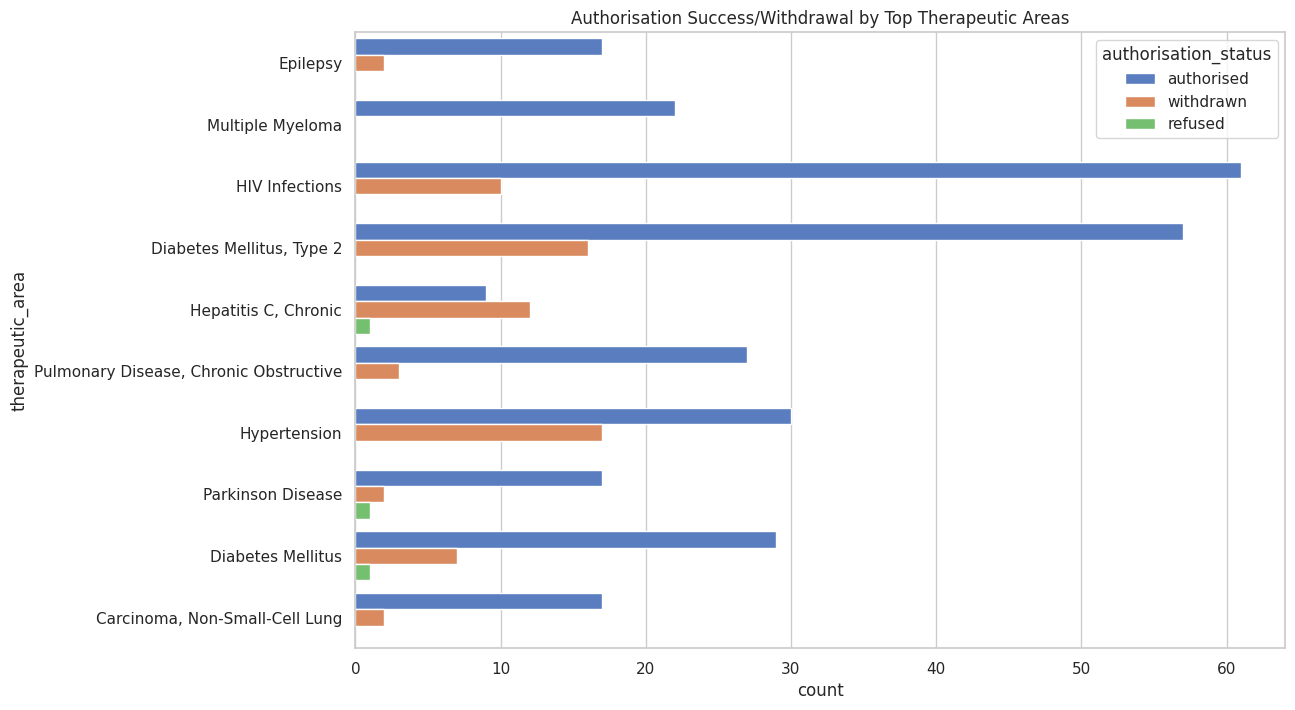

In [50]:
# 1. Cleaned Category Distribution
# Seeing the "Success Rate" per Therapeutic Area
top_areas = df_clean['therapeutic_area'].value_counts().nlargest(10).index
df_top = df_clean[df_clean['therapeutic_area'].isin(top_areas)]

plt.figure(figsize=(12, 8))
sns.countplot(data=df_top, y='therapeutic_area', hue='authorisation_status')
plt.title('Authorisation Success/Withdrawal by Top Therapeutic Areas')
plt.show()

2. Does the character length and complexity of a "Condition Indication" vary significantly between orphan and non-orphan medicines, and does this complexity reflect the increased scientific burden required to justify treatments for rare diseases?

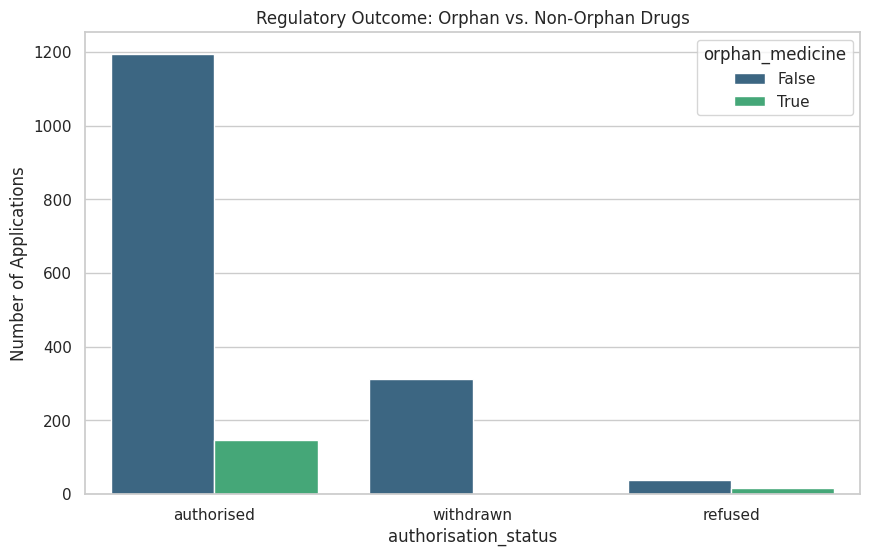

In [35]:
plt.figure(figsize=(10, 6))
# Filter for major statuses to keep it clean
major_status = df_clean['authorisation_status'].value_counts().nlargest(3).index
df_plot = df_clean[df_clean['authorisation_status'].isin(major_status)]

sns.countplot(data=df_plot, x='authorisation_status', hue='orphan_medicine', palette='viridis')
plt.title('Regulatory Outcome: Orphan vs. Non-Orphan Drugs')
plt.ylabel('Number of Applications')
plt.show()

3. Do drugs designated as "Authorised" differ systematically in their clinical complexity or category from those that are "Withdrawn," and what do these patterns suggest about the threshold for regulatory approval in the European market?

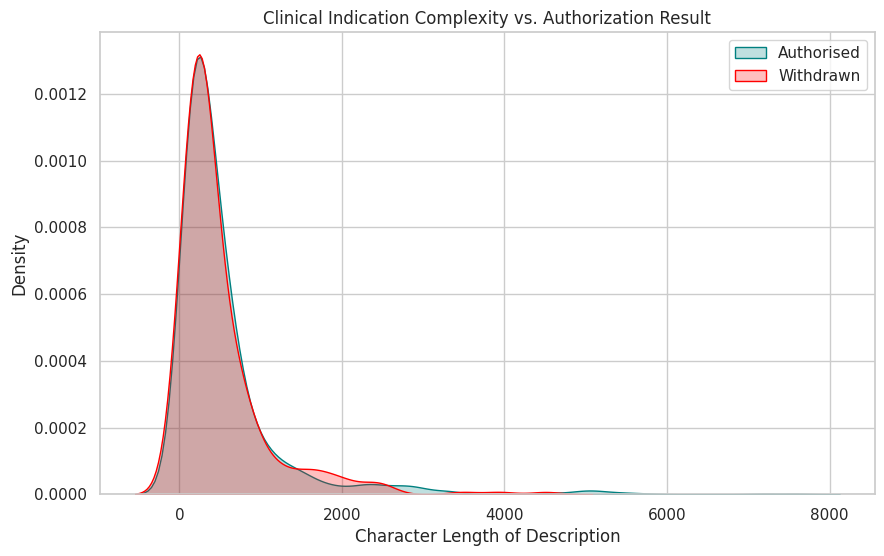

In [37]:
plt.figure(figsize=(10, 6))
# Comparing the 'Shape' of the text length for different outcomes
sns.kdeplot(data=df_clean[df_clean['authorisation_status']=='authorised'],
            x='indication_len', label='Authorised', fill=True, color='teal')
sns.kdeplot(data=df_clean[df_clean['authorisation_status']=='withdrawn'],
            x='indication_len', label='Withdrawn', fill=True, color='red')

plt.title('Clinical Indication Complexity vs. Authorization Result')
plt.xlabel('Character Length of Description')
plt.legend()
plt.show()

4. Which therapeutic areas are most heavily represented in the dataset, and where is drug development activity most concentrated?

/tmp/ipython-input-1949119164.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_areas.values, y=top_10_areas.index, palette='magma')


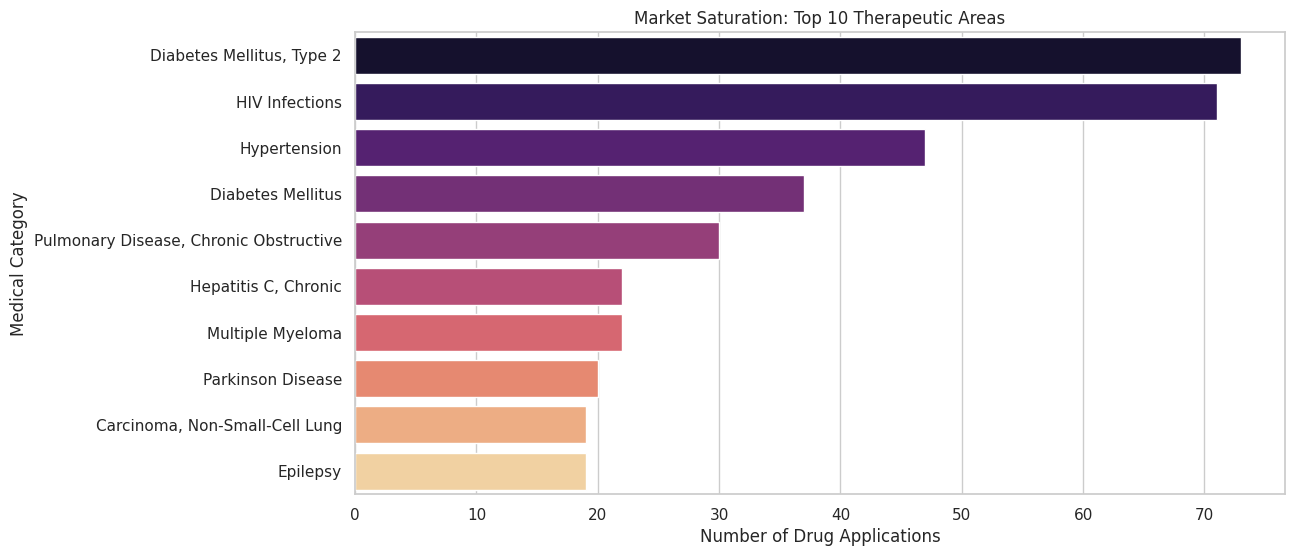

In [39]:
# Identify the Top 10 Therapeutic Areas
top_10_areas = df_clean['therapeutic_area'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_areas.values, y=top_10_areas.index, palette='magma')
plt.title('Market Saturation: Top 10 Therapeutic Areas')
plt.xlabel('Number of Drug Applications')
plt.ylabel('Medical Category')
plt.show()